<font size=5>ECE143 Project: Prediction and Analysis of Heart Failure </font>

# <font size=4> 1. Brief Introduction  </font>

Heart failure is a chronic, progressive condition in which the heart muscles are unable to pump enough blood to meet the body’s needs for blood and oxygen. Basically, the heart cannot keep up with its workload and isn’t pumping as well as it should be. Given the df composed of twelve attributes, we are going to analyze the factors that lead to heart failure and make the prediction.

# <font size=4> 2. Libraries Used In The Analysis   </font>

In [5]:
import pandas as pd
import vaex
import numpy as np
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


# <font size=4> 3. Exploratory Data Analysis & Visualization </font>

In [6]:
df = pd.read_csv('./../data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


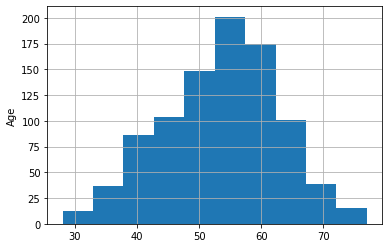

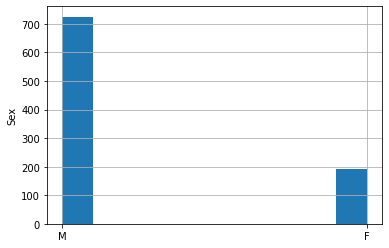

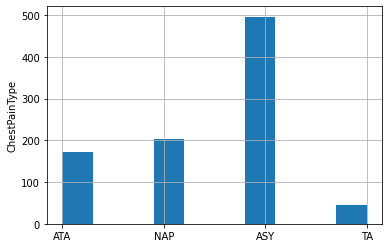

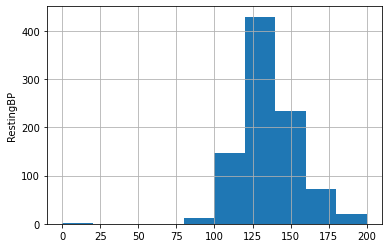

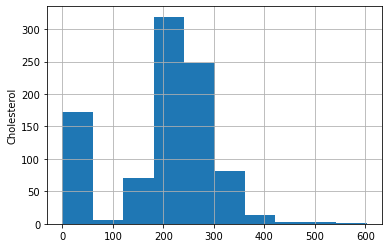

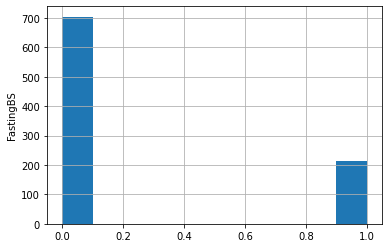

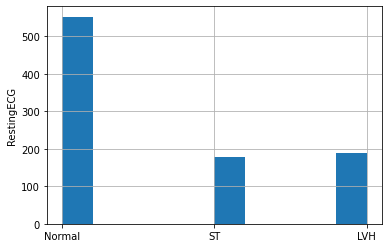

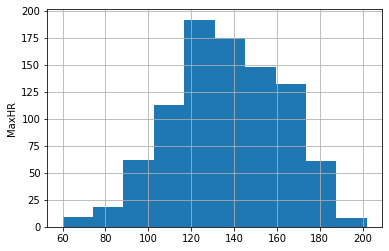

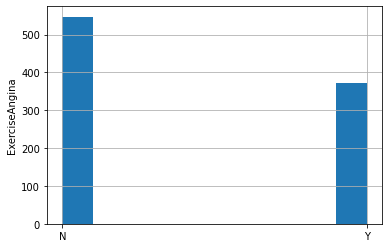

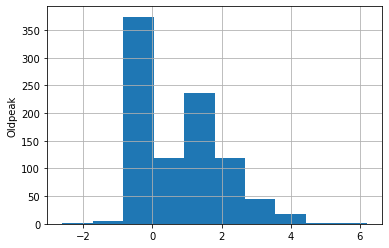

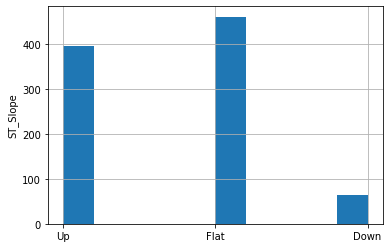

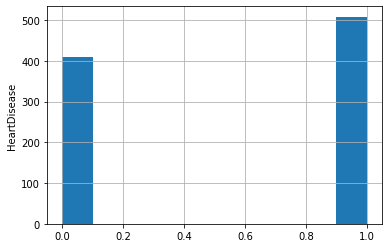

In [9]:
"""
plot the histograms of all features
"""
for keys in df.columns.values.tolist():
    plt.figure()
    plt.ylabel(keys)
    df[keys].hist()
   

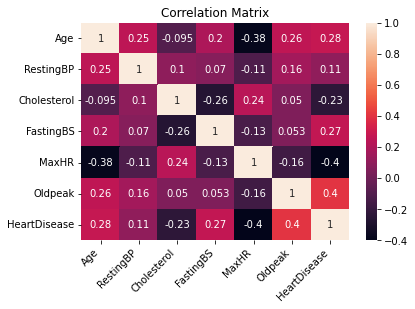

In [10]:
"""
plot the correlation matrix
"""
corr = df.corr(method = 'pearson')# std covariance
ax = sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

([<matplotlib.patches.Wedge at 0x22381167d30>,
 [Text(-1.5556349186104046, 1.5556349186104048, 'Flat'),
  Text(1.0205371524351101, -1.9489750948895264, 'Up'),
  Text(2.0997622468997545, -0.6565047650204031, 'Down')],
 [Text(-0.8485281374238569, 0.848528137423857, '75.00%'),
  Text(0.5566566286009691, -1.063077324485196, '15.35%'),
  Text(1.1453248619453207, -0.3580935081929471, '9.65%')])

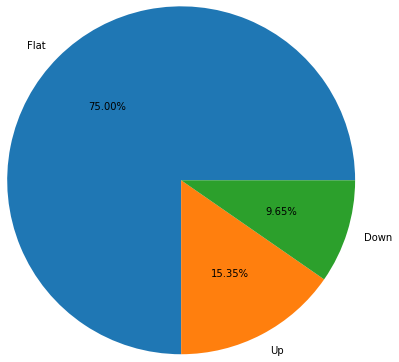

In [11]:
import matplotlib
"""
distribution of each factor for heart failure
"""
heart_failure = df[df.HeartDisease == 1]
pie = heart_failure.ST_Slope.value_counts(normalize=True)
matplotlib.pyplot.pie(pie,labels=['Flat','Up',"Down"],autopct = '%0.2f%%',radius = 2)


In [12]:



"""
group by sex: male, female
"""
df['Sex'].value_counts()
male_data = df[df.Sex == 'M']
female_data = df[df.Sex == 'F']

In [13]:
male_data.info()
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             725 non-null    int64  
 1   Sex             725 non-null    object 
 2   ChestPainType   725 non-null    object 
 3   RestingBP       725 non-null    int64  
 4   Cholesterol     725 non-null    int64  
 5   FastingBS       725 non-null    int64  
 6   RestingECG      725 non-null    object 
 7   MaxHR           725 non-null    int64  
 8   ExerciseAngina  725 non-null    object 
 9   Oldpeak         725 non-null    float64
 10  ST_Slope        725 non-null    object 
 11  HeartDisease    725 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 73.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ag

In [14]:
male_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724
std,9.397864,18.286739,112.351444,0.438559,25.719191,1.087154,0.482670
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,156.000000,0.000000,117.000000,0.000000,0.000000
50%,55.000000,130.000000,219.000000,0.000000,134.000000,0.800000,1.000000
75%,60.000000,140.000000,261.000000,1.000000,152.000000,1.700000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000


In [15]:
female_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
std,9.517593,19.392638,85.195441,0.342307,22.154902,0.956865,0.439262
min,30.000000,94.000000,0.000000,0.000000,90.000000,0.000000,0.000000
25%,46.000000,120.000000,204.000000,0.000000,130.000000,0.000000,0.000000
50%,53.000000,130.000000,243.000000,0.000000,150.000000,0.000000,0.000000
75%,60.000000,140.000000,288.000000,0.000000,163.000000,1.100000,1.000000
max,76.000000,200.000000,564.000000,1.000000,192.000000,6.200000,1.000000


# <font size=4> 3. Exploratory Data Analysis & Visualization </font>